Found 2603 images belonging to 4 classes.
Found 647 images belonging to 4 classes.


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/16


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 305ms/step - accuracy: 0.7959 - loss: 0.4988 - val_accuracy: 0.9359 - val_loss: 0.1690
Epoch 2/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9062 - loss: 0.1883 - val_accuracy: 1.0000 - val_loss: 0.1776
Epoch 3/16


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.9294 - loss: 0.1700 - val_accuracy: 0.9781 - val_loss: 0.0756
Epoch 4/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9688 - loss: 0.1113 - val_accuracy: 1.0000 - val_loss: 0.1038
Epoch 5/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 314ms/step - accuracy: 0.9688 - loss: 0.0988 - val_accuracy: 0.9922 - val_loss: 0.0469
Epoch 6/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9688 - loss: 0.0446 - val_accuracy: 0.8571 - val_loss: 0.1241
Epoch 7/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.9688 - loss: 0.0761 - val_accuracy: 0.9906 - val_loss: 0.0312
Epoch 8/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9688 - loss: 0.0627 - val_accuracy: 1.0000 - val_loss: 0.0395
Epoch 9/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.9909 - loss: 0.0359 - val_accuracy: 0.9891 - val_loss: 0.0383
Epoch 10/16
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 1.0000 - loss: 0.0539 - val_accuracy: 1.0000 -

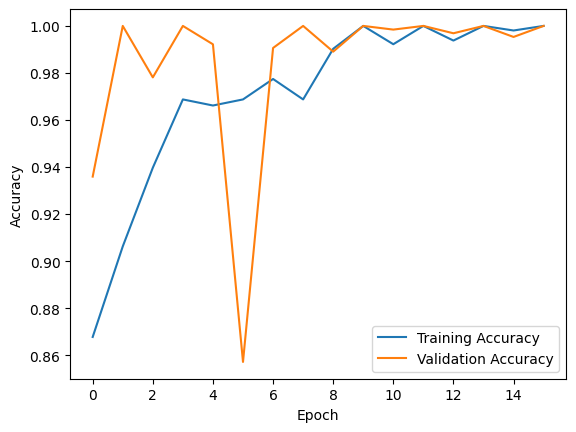

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

# Preprocessing function to replace white background with black
def replace_white_background(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(image, np.array([240, 240, 240]), np.array([255, 255, 255]))
    image[mask == 255] = [0, 0, 0]
    return image

# Directory and model parameters
train_dir = 'dataset'
img_width, img_height = 150, 150
batch_size = 32
epochs = 16

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    preprocessing_function=replace_white_background
)

# Data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define an extremely simplified CNN model
model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(4, activation='softmax')  # 4 classes: apples, oranges, pears, empty
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('fruit_classifier_model_minimal_2.keras')
